## Feed Forward Neural Network

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
spotify = pd.read_csv('../Data/spotify_encoded.csv', index_col='track_id')
spotify.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
track_id,,,,,,,,,,,,,,,,,,,,,
5SuOikwiRyPMVoIQDJUgSV,73,-0.004759,-0.309921,0.648283,-0.678397,-1.205833,0.350223,-1.306583,0.448128,-0.868312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4qPNDBW1i3p13qLCt0Ki3A,55,-0.692843,-0.309921,-0.781882,-1.818618,-1.205833,-1.616854,0.765355,-0.117369,1.756407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1iJBSr7s7jYXzM8EGcbK5b,57,-0.173180,-0.309921,-0.681324,-1.072643,-1.486792,-0.210138,0.765355,-0.292021,-0.345016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6lfxq3CG4xtTiEg7opyCyx,71,-0.248673,-0.309921,-1.642216,-2.229870,-1.486792,-1.856901,0.765355,-0.456498,1.700487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5vjLSffimiIP26QG5WcN2K,82,-0.274819,-0.309921,0.324261,-0.747970,-0.924873,-0.200198,0.765355,-0.318303,0.417265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X = spotify.drop(['popularity'], axis=1)
y = spotify['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(1)  
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=10,     
    restore_best_weights=True  
)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

loss, mae = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

Epoch 1/100
1482/1482 [==============================] - 3s 2ms/step - loss: 392.4997 - mae: 14.9341 - val_loss: 251.6410 - val_mae: 11.4867
Epoch 2/100
1482/1482 [==============================] - 2s 2ms/step - loss: 267.4936 - mae: 11.9686 - val_loss: 243.2968 - val_mae: 11.0531
Epoch 3/100
1482/1482 [==============================] - 2s 1ms/step - loss: 262.6095 - mae: 11.7493 - val_loss: 243.1040 - val_mae: 11.0317
Epoch 4/100
1482/1482 [==============================] - 1s 844us/step - loss: 258.2639 - mae: 11.6422 - val_loss: 241.2480 - val_mae: 10.9707
Epoch 5/100
1482/1482 [==============================] - 2s 2ms/step - loss: 255.5354 - mae: 11.5543 - val_loss: 239.8880 - val_mae: 10.8696
Epoch 6/100
1482/1482 [==============================] - 2s 2ms/step - loss: 254.3107 - mae: 11.4962 - val_loss: 240.2461 - val_mae: 10.9302
Epoch 7/100
1482/1482 [==============================] - 2s 2ms/step - loss: 251.9145 - mae: 11.4512 - val_loss: 238.8403 - val_mae: 10.8056
Epoch 8/100

In [5]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print('Training Set Metrics:')
print(f'MSE: {mse_train:.4f}')
print(f'RMSE: {rmse_train:.4f}')
print(f'MAE: {mae_train:.4f}')
print(f'R2: {r2_train:.4f}')
print()

print('Testing Set Metrics:')
print(f'MSE: {mse_test:.4f}')
print(f'RMSE: {rmse_test:.4f}')
print(f'MAE: {mae_test:.4f}')
print(f'R2: {r2_test:.4f}')

618/618 [==============================] - 0s 250us/step
Training Set Metrics:
MSE: 214.2655
RMSE: 14.6378
MAE: 10.1849
R2: 0.4340

Testing Set Metrics:
MSE: 230.9279
RMSE: 15.1963
MAE: 10.5986
R2: 0.3969


2470/2470 [==============================] - 1s 253us/step


Text(0.5, 0, 'Actual Popularity')

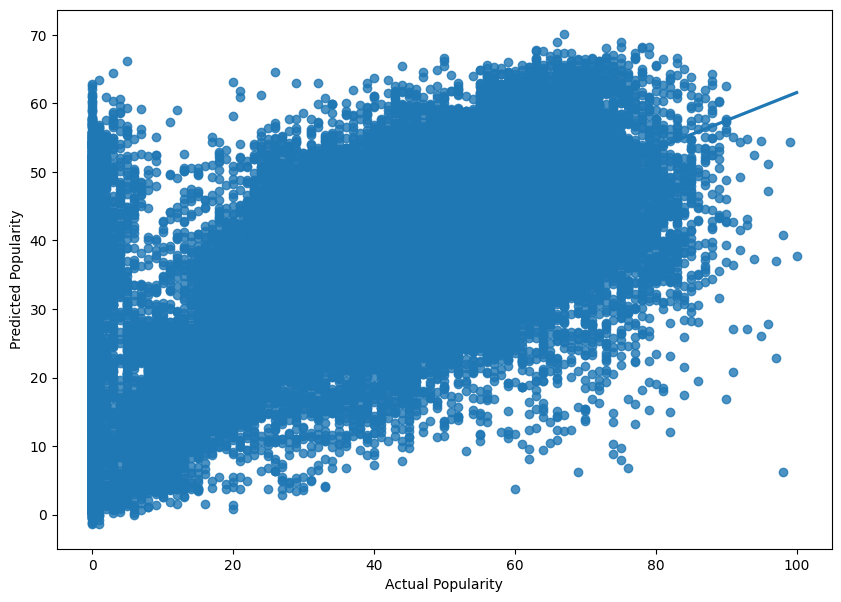

In [6]:
spotify['predicted_popularity'] = model.predict(X)

plt.figure(figsize=(10,7))
ax = sns.regplot(x="popularity", y="predicted_popularity", data=spotify)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_ylabel('Predicted Popularity')
ax.set_xlabel('Actual Popularity')